# Fuzzy logic for bioreactor control

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# New Antecedent/Consequent objects (universe variables and membership functions)
o2 = ctrl.Antecedent(np.arange(0, 11, 1), 'o2') #[l/min]
temp = ctrl.Antecedent(np.arange(15, 51, 1), 'temp') #[C]
pH = ctrl.Antecedent(np.arange(0, 13,0.5), 'pH')
foam = ctrl.Antecedent(np.arange(0, 16, 1), 'foam') #height in cm
nacl = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'nacl') #[g/l]
ash = ctrl.Antecedent(np.arange(0, 8.1,0.1), 'ash') #[g/l]
turbidity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'turbidity') #relative
aeration = ctrl.Consequent(np.arange(0, 11, 1), 'aeration') #vvm (l/l/m)
agitation = ctrl.Consequent(np.arange(0, 81, 5), 'agitation') #rpm
feed_rate = ctrl.Consequent(np.arange(0, 11, 1), 'feed_rate') #[l/day]


# Membership functions

In [3]:
o2['low'] = fuzz.trimf(o2.universe, [0, 0, 4])
o2['medium'] = fuzz.trimf(o2.universe, [3, 5, 7])
o2['high'] = fuzz.trimf(o2.universe, [6, 8, 10])

In [4]:
#o2.view()

In [5]:
temp['low'] = fuzz.trimf(temp.universe, [15, 15, 30])
temp['medium'] = fuzz.trimf(temp.universe, [25, 30, 35])
temp['high'] = fuzz.trimf(temp.universe, [30, 40, 50])

In [6]:
#temp.view()

In [7]:
pH['low'] = fuzz.trimf(pH.universe, [0, 0, 1])
pH['medium'] = fuzz.trimf(pH.universe, [1, 2, 3])
pH['high'] = fuzz.trimf(pH.universe, [2, 5, 12])

In [8]:
#pH.view()

In [9]:
foam['low'] = fuzz.trimf(foam.universe, [0, 0, 2])
foam['medium'] = fuzz.trimf(foam.universe, [0, 3, 7])
foam['high'] = fuzz.trimf(foam.universe, [5, 10, 15])

In [10]:
#foam.view()

In [11]:
nacl['low'] = fuzz.trimf(nacl.universe, [0, 0, 0.5])
nacl['medium'] = fuzz.trimf(nacl.universe, [0, 0.5, 1])
nacl['high'] = fuzz.trimf(nacl.universe, [0.8, 1.4, 2])

In [12]:
#nacl.view()

In [13]:
ash['low'] = fuzz.trimf(ash.universe, [0, 0, 4])
ash['medium'] = fuzz.trimf(ash.universe, [3.5, 4, 4.5])
ash['high'] = fuzz.trimf(ash.universe, [4, 6, 8])

In [14]:
#ash.view()

In [15]:
turbidity['low'] = fuzz.trimf(turbidity.universe, [0, 0, 0.5])
turbidity['medium'] = fuzz.trimf(turbidity.universe, [0.4, 0.5, 0.6])
turbidity['high'] = fuzz.trimf(turbidity.universe, [0.5, 0.8, 1])

In [16]:
#turbidity.view()

In [17]:
aeration['L'] = fuzz.trimf(aeration.universe, [0, 0, 2])
aeration['LM'] = fuzz.trimf(aeration.universe, [2, 3, 4])
aeration['M'] = fuzz.trimf(aeration.universe, [3, 5, 7])
aeration['HM'] = fuzz.trimf(aeration.universe, [6, 7, 8])
aeration['H'] = fuzz.trimf(aeration.universe, [8, 9, 10])

In [18]:
#aeration.view()

In [19]:
agitation['L'] = fuzz.trimf(agitation.universe, [0, 0, 50])
agitation['M'] = fuzz.trimf(agitation.universe, [40, 50, 60])
agitation['H'] = fuzz.trimf(agitation.universe, [60, 70, 80])

In [20]:
#agitation.view()

In [21]:
feed_rate['L'] = fuzz.trimf(o2.universe, [0, 0, 4])
feed_rate['M'] = fuzz.trimf(o2.universe, [3, 5, 7])
feed_rate['H'] = fuzz.trimf(o2.universe, [6, 8, 10])

In [22]:
#feed_rate.view()

Displaying all membership functions at once

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


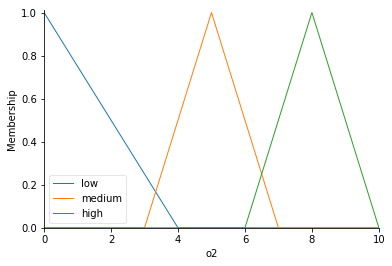

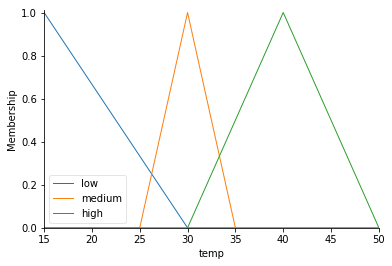

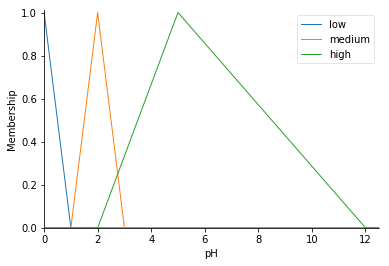

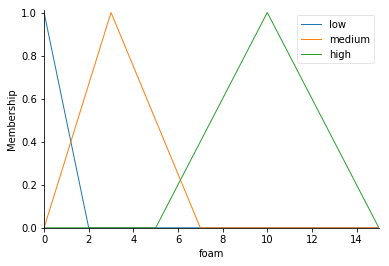

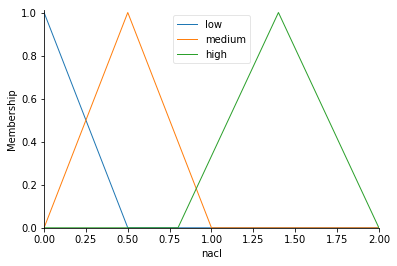

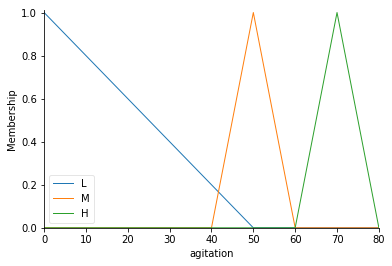

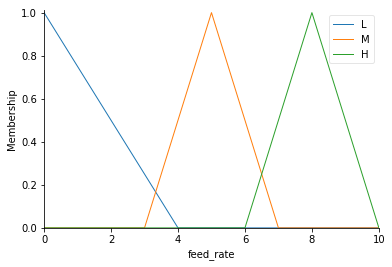

In [23]:
o2.view()
temp.view()
pH.view()
foam.view()
nacl.view()
ash.view()
turbidity.view()
aeration.view()
agitation.view()
feed_rate.view()

# Defining rules 

In [24]:
#RULES FOR AERATION
rule1 = ctrl.Rule(foam['high']| (o2['high'] & temp['high']), aeration['L'])
rule2 = ctrl.Rule((o2['low'] & temp['medium']) | (o2['medium'] & temp['low']), aeration['HM'])
rule3 = ctrl.Rule(o2['high'] & temp['medium'] | o2['medium'] & temp['high'], aeration['LM'])
rule4 = ctrl.Rule(o2['medium'] & temp['medium'] | o2['high'] & temp['low']| o2['high'] & temp['low'], aeration['M'])
rule5 = ctrl.Rule(o2['low'] & temp['low'], aeration['H'])

In [25]:
#RULES FOR AGITATION
rule11 = ctrl.Rule(foam['high'] | turbidity['high'], agitation['L'])
rule12 = ctrl.Rule(o2['high'] | o2['medium'], agitation['M'])
rule13 = ctrl.Rule(o2['low'], agitation['H'])

In [26]:
#RULES FOR FEED RATE
rule21 = ctrl.Rule(turbidity['high'] | ash['high'] | nacl['high'], feed_rate['L'])
rule22 = ctrl.Rule(pH['high'] | ash['low'] | nacl['low'], feed_rate['H'])
rule23 = ctrl.Rule(pH['high'] | pH['low'], feed_rate['M'])

DISPLAYING RULE DIAGRAMS (check for loops)

(<matplotlib.figure.Figure at 0x11a061e48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a091b38>)

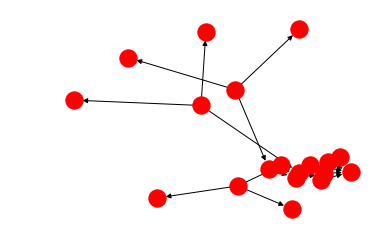

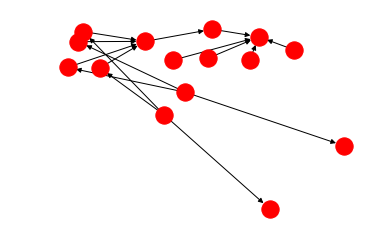

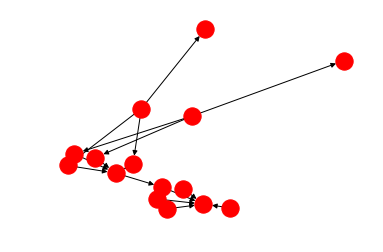

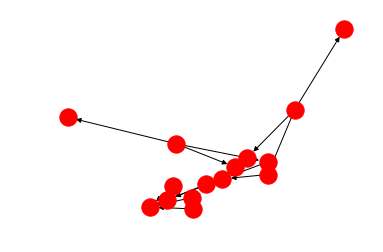

In [27]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()

In [28]:
rule11.view()
rule12.view()
rule13.view()

(<matplotlib.figure.Figure at 0x11b077d68>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b095c18>)

(<matplotlib.figure.Figure at 0x11a62e7f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b04d390>)

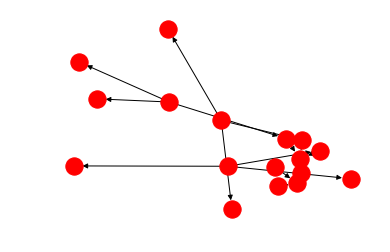

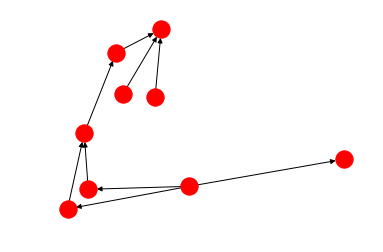

In [29]:
rule21.view()
rule22.view()
rule23.view()

# Setting the cotrol systems and simulations

In [30]:
aeration_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
agitation_ctrl = ctrl.ControlSystem([rule11, rule12, rule13]) 
feeding_ctrl = ctrl.ControlSystem([rule21, rule22, rule23])

SIMULATING (input numbers could be changed)

44.141


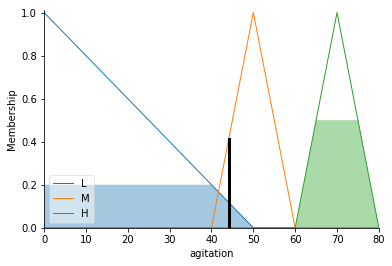

In [32]:
agitationing = ctrl.ControlSystemSimulation(agitation_ctrl)

agitationing.input['o2'] = 2
agitationing.input['foam'] = 14
agitationing.input['turbidity'] = 7

agitationing.compute()
print (round(agitationing.output['agitation'],3))
agitation.view(sim=agitationing)

4.988


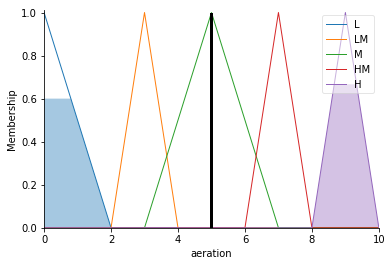

In [33]:
aerationing = ctrl.ControlSystemSimulation(aeration_ctrl)

aerationing.input['o2'] = 1
aerationing.input['foam'] = 12
aerationing.input['temp'] = 20

aerationing.compute()
print (round(aerationing.output['aeration'],3))
aeration.view(sim=aerationing)

4.457


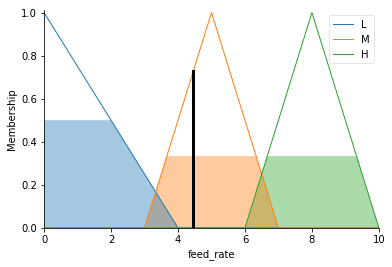

In [34]:
fr = ctrl.ControlSystemSimulation(feeding_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
fr.input['nacl'] = 1
fr.input['ash'] = 5
fr.input['turbidity'] = 0.3
fr.input['pH'] = 3
# Crunch the numbers
fr.compute()
print (round(fr.output['feed_rate'],3))
feed_rate.view(sim=fr)